R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


# run synthesize 003.json


----------
library(jsonlite)
library(ggplot2)
data <- fromJSON('[{"Month": "Start", "Net Cash Flow": 80000, "Net Cash Flow Sum": 80000, "c": 0, "d": false}, {"Month": "Apr", "Net Cash Flow": -5003, "Net Cash Flow Sum": 74997, "c": 80000, "d": true}, {"Month": "May", "Net Cash Flow": -16700, "Net Cash Flow Sum": 58297, "c": 74997, "d": true}, {"Month": "Jun", "Net Cash Flow": 48802, "Net Cash Flow Sum": 107099, "c": 58297, "d": false}, {"Month": "Jul", "Net Cash Flow": -11198, "Net Cash Flow Sum": 95901, "c": 107099, "d": true}, {"Month": "Aug", "Net Cash Flow": -35260, "Net Cash Flow Sum": 60641, "c": 95901, "d": true}, {"Month": "Sep", "Net Cash Flow": 18220, "Net Cash Flow Sum": 78861, "c": 60641, "d": false}, {"Month": "Oct", "Net Cash Flow": -23840, "Net Cash Flow Sum": 55021, "c": 78861, "d": true}, {"Month": "Nov", "Net Cash Flow": 43250, "Net Cash Flow Sum": 98271, "c": 55021, "d": false}, {"Month": "Dec", "Net Cash Flow": -18280, "Net Cash Flow Sum": 79991, "c": 98271, "d": tru

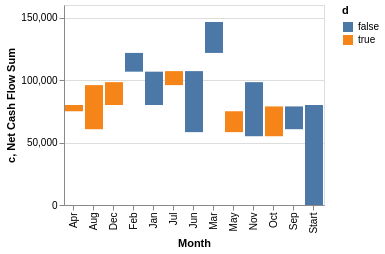

In [1]:
import json
import pandas as pd
import os
from vega import VegaLite
from ipywidgets import widgets

from falx.chart import *
from interface import Falx

DATA_DIR = os.path.join("..", "benchmarks")

def try_example(fname):

    with open(os.path.join(DATA_DIR, fname), "r") as f:
        data = json.load(f)

    print("# run synthesize {}".format(fname))

    input_data = table_utils.load_and_clean_table(data["input_data"])
    vis = VisDesign.load_from_vegalite(data["vl_spec"], data["output_data"])
    ggplot_script = "\n".join(vis.to_ggplot2())
    
    # display plot
    VegaLite(vis.to_vl_obj()).display()
    
    print('----------')
    print(ggplot_script)
    print('----------')
    
    
text_box = widgets.Text(value='001.json')
button = widgets.Button(description="run")

display(text_box)
display(button)

def on_button_clicked(b):
    try_example(text_box.value)

button.on_click(on_button_clicked)